In [7]:
import pi
from graphs import graph_bitcoin, graph_bridge, graph_karate_club
from metrics import ConvergenceTime, NodeVisits
from simulation import Simulation
import matplotlib.pyplot as plt

In [8]:
karate = graph_karate_club()

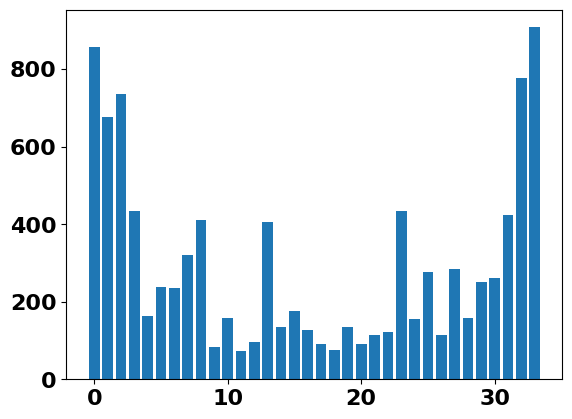

In [14]:
sim = Simulation(
    karate,
    pi.uniform(karate),
    graph_name='karate_uniform',
    metrics={'NodeVisits': NodeVisits}
).run()

node_visits = sim.metrics['NodeVisits']

plt.bar(list(node_visits.heatmap.keys()), node_visits.heatmap.values())
plt.show()

Bitcoin graph: Graph with 3783 nodes and 14124 edges
Subgraph: Graph with 495 nodes and 5011 edges
Bitcoin graph: Graph with 3783 nodes and 14124 edges
Selected subgraph: Graph with 439 nodes and 3190 edges


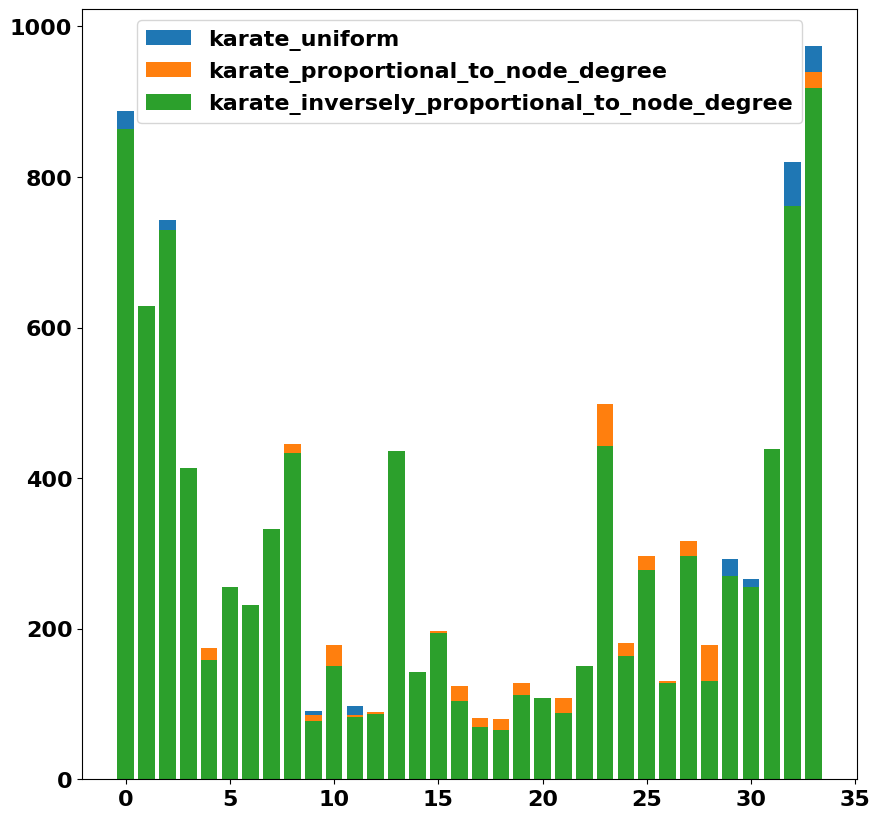

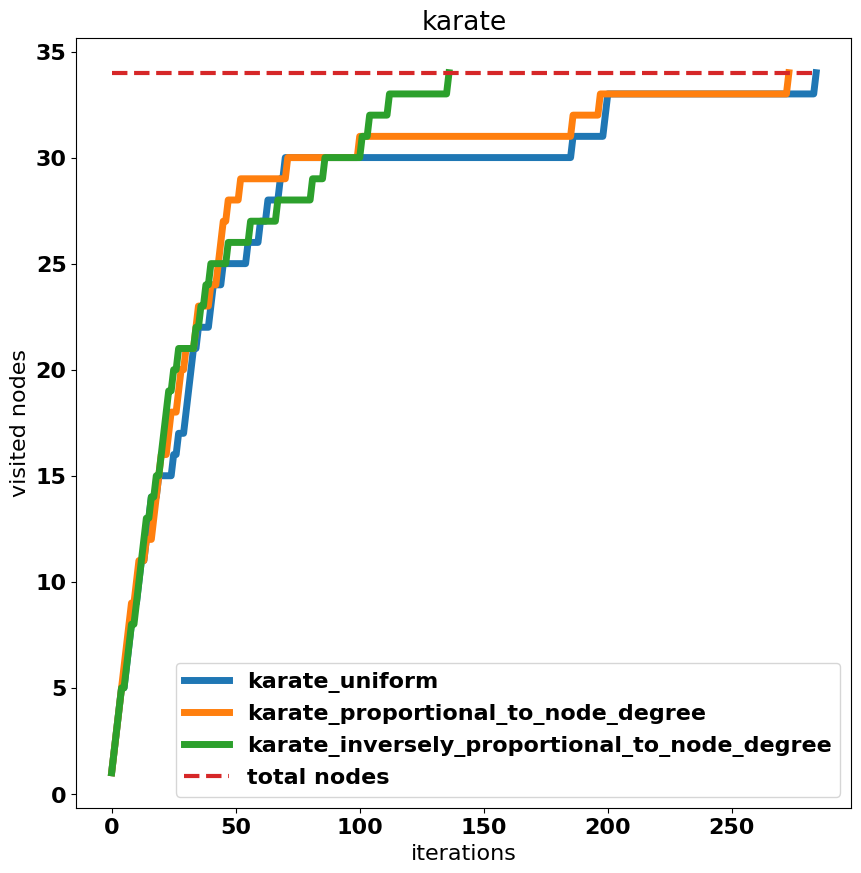

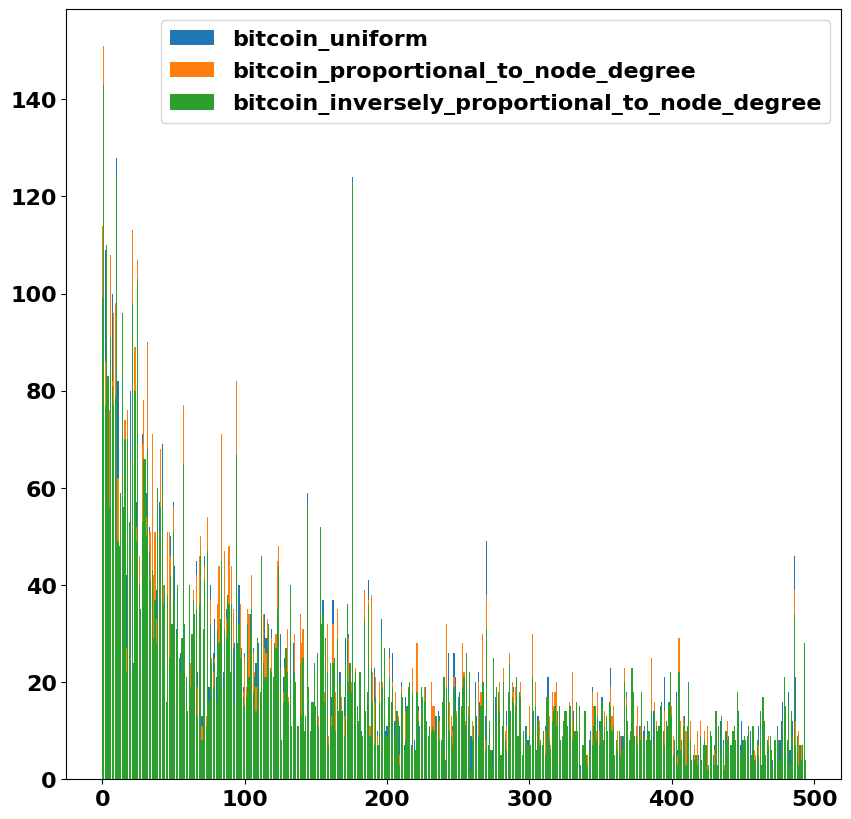

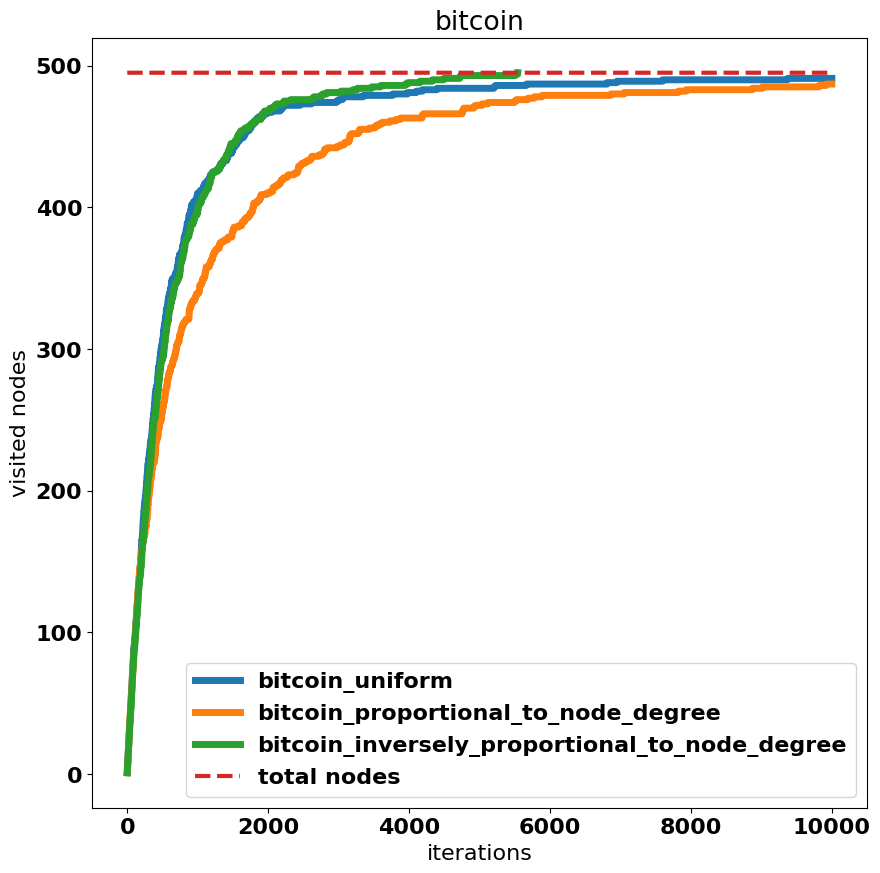

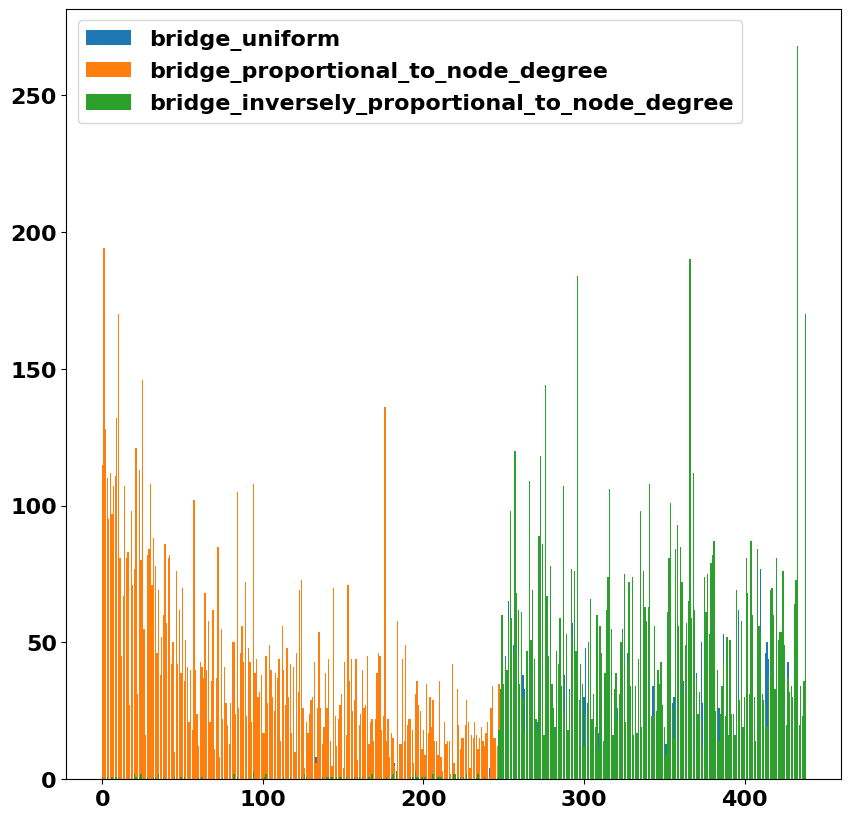

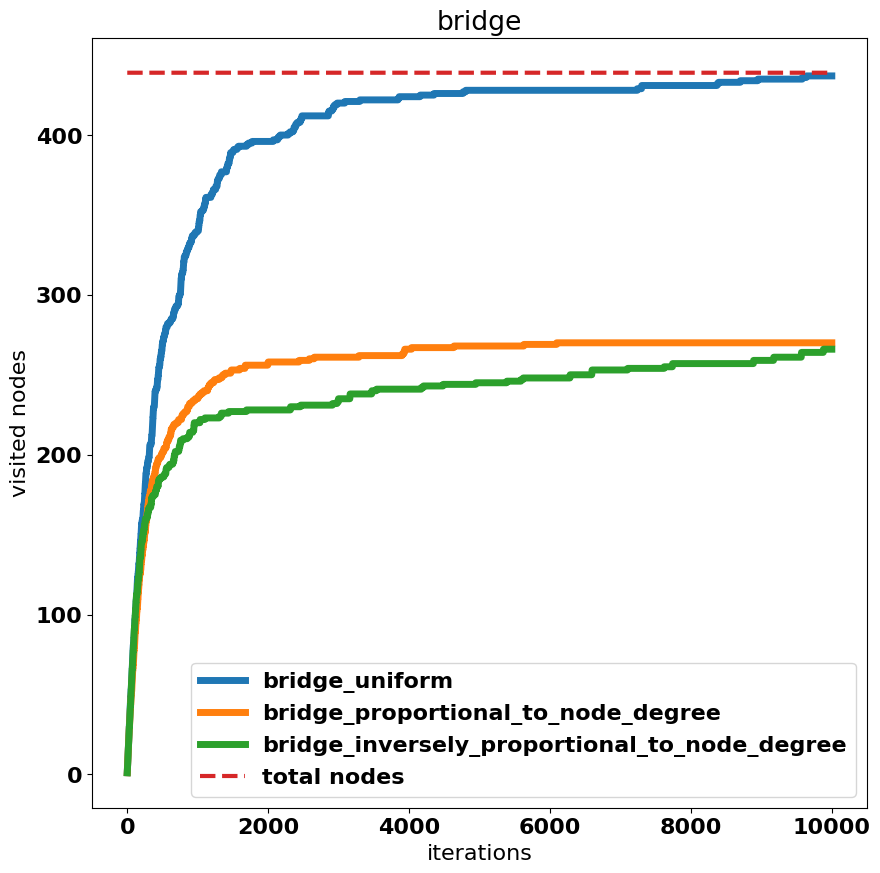

In [15]:
for graph, graph_name in [(graph_karate_club(), 'karate'), (graph_bitcoin(500), 'bitcoin'), (graph_bridge(250), 'bridge')]:
    sims = [
        Simulation(
            graph,
            pi.uniform(graph),
            graph_name=f'{graph_name}_uniform',
            metrics={'ConvergenceTime': ConvergenceTime, 'NodeVisits': NodeVisits}
        ),
        Simulation(
            graph,
            pi.proportional_to_node_degree(graph),
            graph_name=f'{graph_name}_proportional_to_node_degree',
            metrics={'ConvergenceTime': ConvergenceTime, 'NodeVisits': NodeVisits}
        ),
        Simulation(
            graph,
            pi.inversely_proportional_to_node_degree(graph),
            graph_name=f'{graph_name}_inversely_proportional_to_node_degree',
            metrics={'ConvergenceTime': ConvergenceTime, 'NodeVisits': NodeVisits}
        )
    ]
    
    for sim in sims:
        sim.run()
    
    plt.figure(figsize=(10, 10))
    for sim in sims:
        node_visits = sim.metrics['NodeVisits']
        plt.bar(list(node_visits.heatmap.keys()), node_visits.heatmap.values(), label=sim.graph_name)
    
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 10))
    max_xs = []
    N = 0
    for sim in sims:
        N = sim.N
        convergence_time = sim.metrics['ConvergenceTime']
        
        if len(convergence_time.xs) > len(max_xs):
            max_xs = convergence_time.xs
        
        plt.plot(convergence_time.xs, convergence_time.ys, linewidth=5, label=sim.graph_name)
    
    plt.plot(max_xs, [N] * len(max_xs), label='total nodes',
        linewidth=3, linestyle='--')
    
    plt.xlabel('iterations')
    plt.ylabel('visited nodes')
    plt.title(f'{graph_name}')
    plt.legend()
    plt.show()